In [1]:
import datetime as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import metpy  # noqa: F401
import glob
import os
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cf
import xarray
from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES, interplevel, get_cartopy, to_np
from datetime import datetime
import pandas as pd

In [2]:
from goespy.Downloader import ABI_Downloader


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v


In [ ]:
def download_data(year,month,day,hour):
    utcDateTime = dt.datetime(year,month,day,hour) 
    year = utcDateTime.strftime("%Y")
    month = utcDateTime.strftime("%m")
    day = utcDateTime.strftime("%d")
    hour = utcDateTime.strftime("%H")
    ##Choose a channel from your preference (can be C01-C16)
    channel = ["C13"]

    ## In GOES satellite they have 9 products
    ## 3 are L1b-Rad(M,C,F)
    ## 3 are L2-CMIP(M,C,F)
    ## 3 are L2-MCMIP(M,C,F)
    ### In your case we will get the CMIPF, F means FullDisk (all the projection by the satellite)
    product = 'ABI-L2-CMIPF'

    Bucket = 'noaa-goes16'
    Abi = ABI_Downloader('noaa-goes16',year,month,day,hour,product,channel)

In [8]:
pdr1=pd.date_range("2018-05-23","2018-05-25",freq="12H")
pdr2=pd.date_range("2018-09-23","2018-09-25",freq="12H")
pdrs=[pdr1,pdr2]

In [9]:
from netCDF4 import Dataset

wrfile = Dataset('/media/lucasdmarten/HD/DADOS_TCC/RESULTADOS/CASO1/MEMBRO2/wrfout_d01_2018-05-22_18:00:00')
lat=wrfile['XLAT'][:].data
lon=wrfile['XLONG'][:].data  

In [10]:
lon.min()

-63.635376

In [10]:
for pdr in pdrs:
    for time in pdr:
        download_data(2018,time.month,time.day,time.hour)

NameError: name 'download_data' is not defined

TypeError: set_xticks() got an unexpected keyword argument 'fontsize'

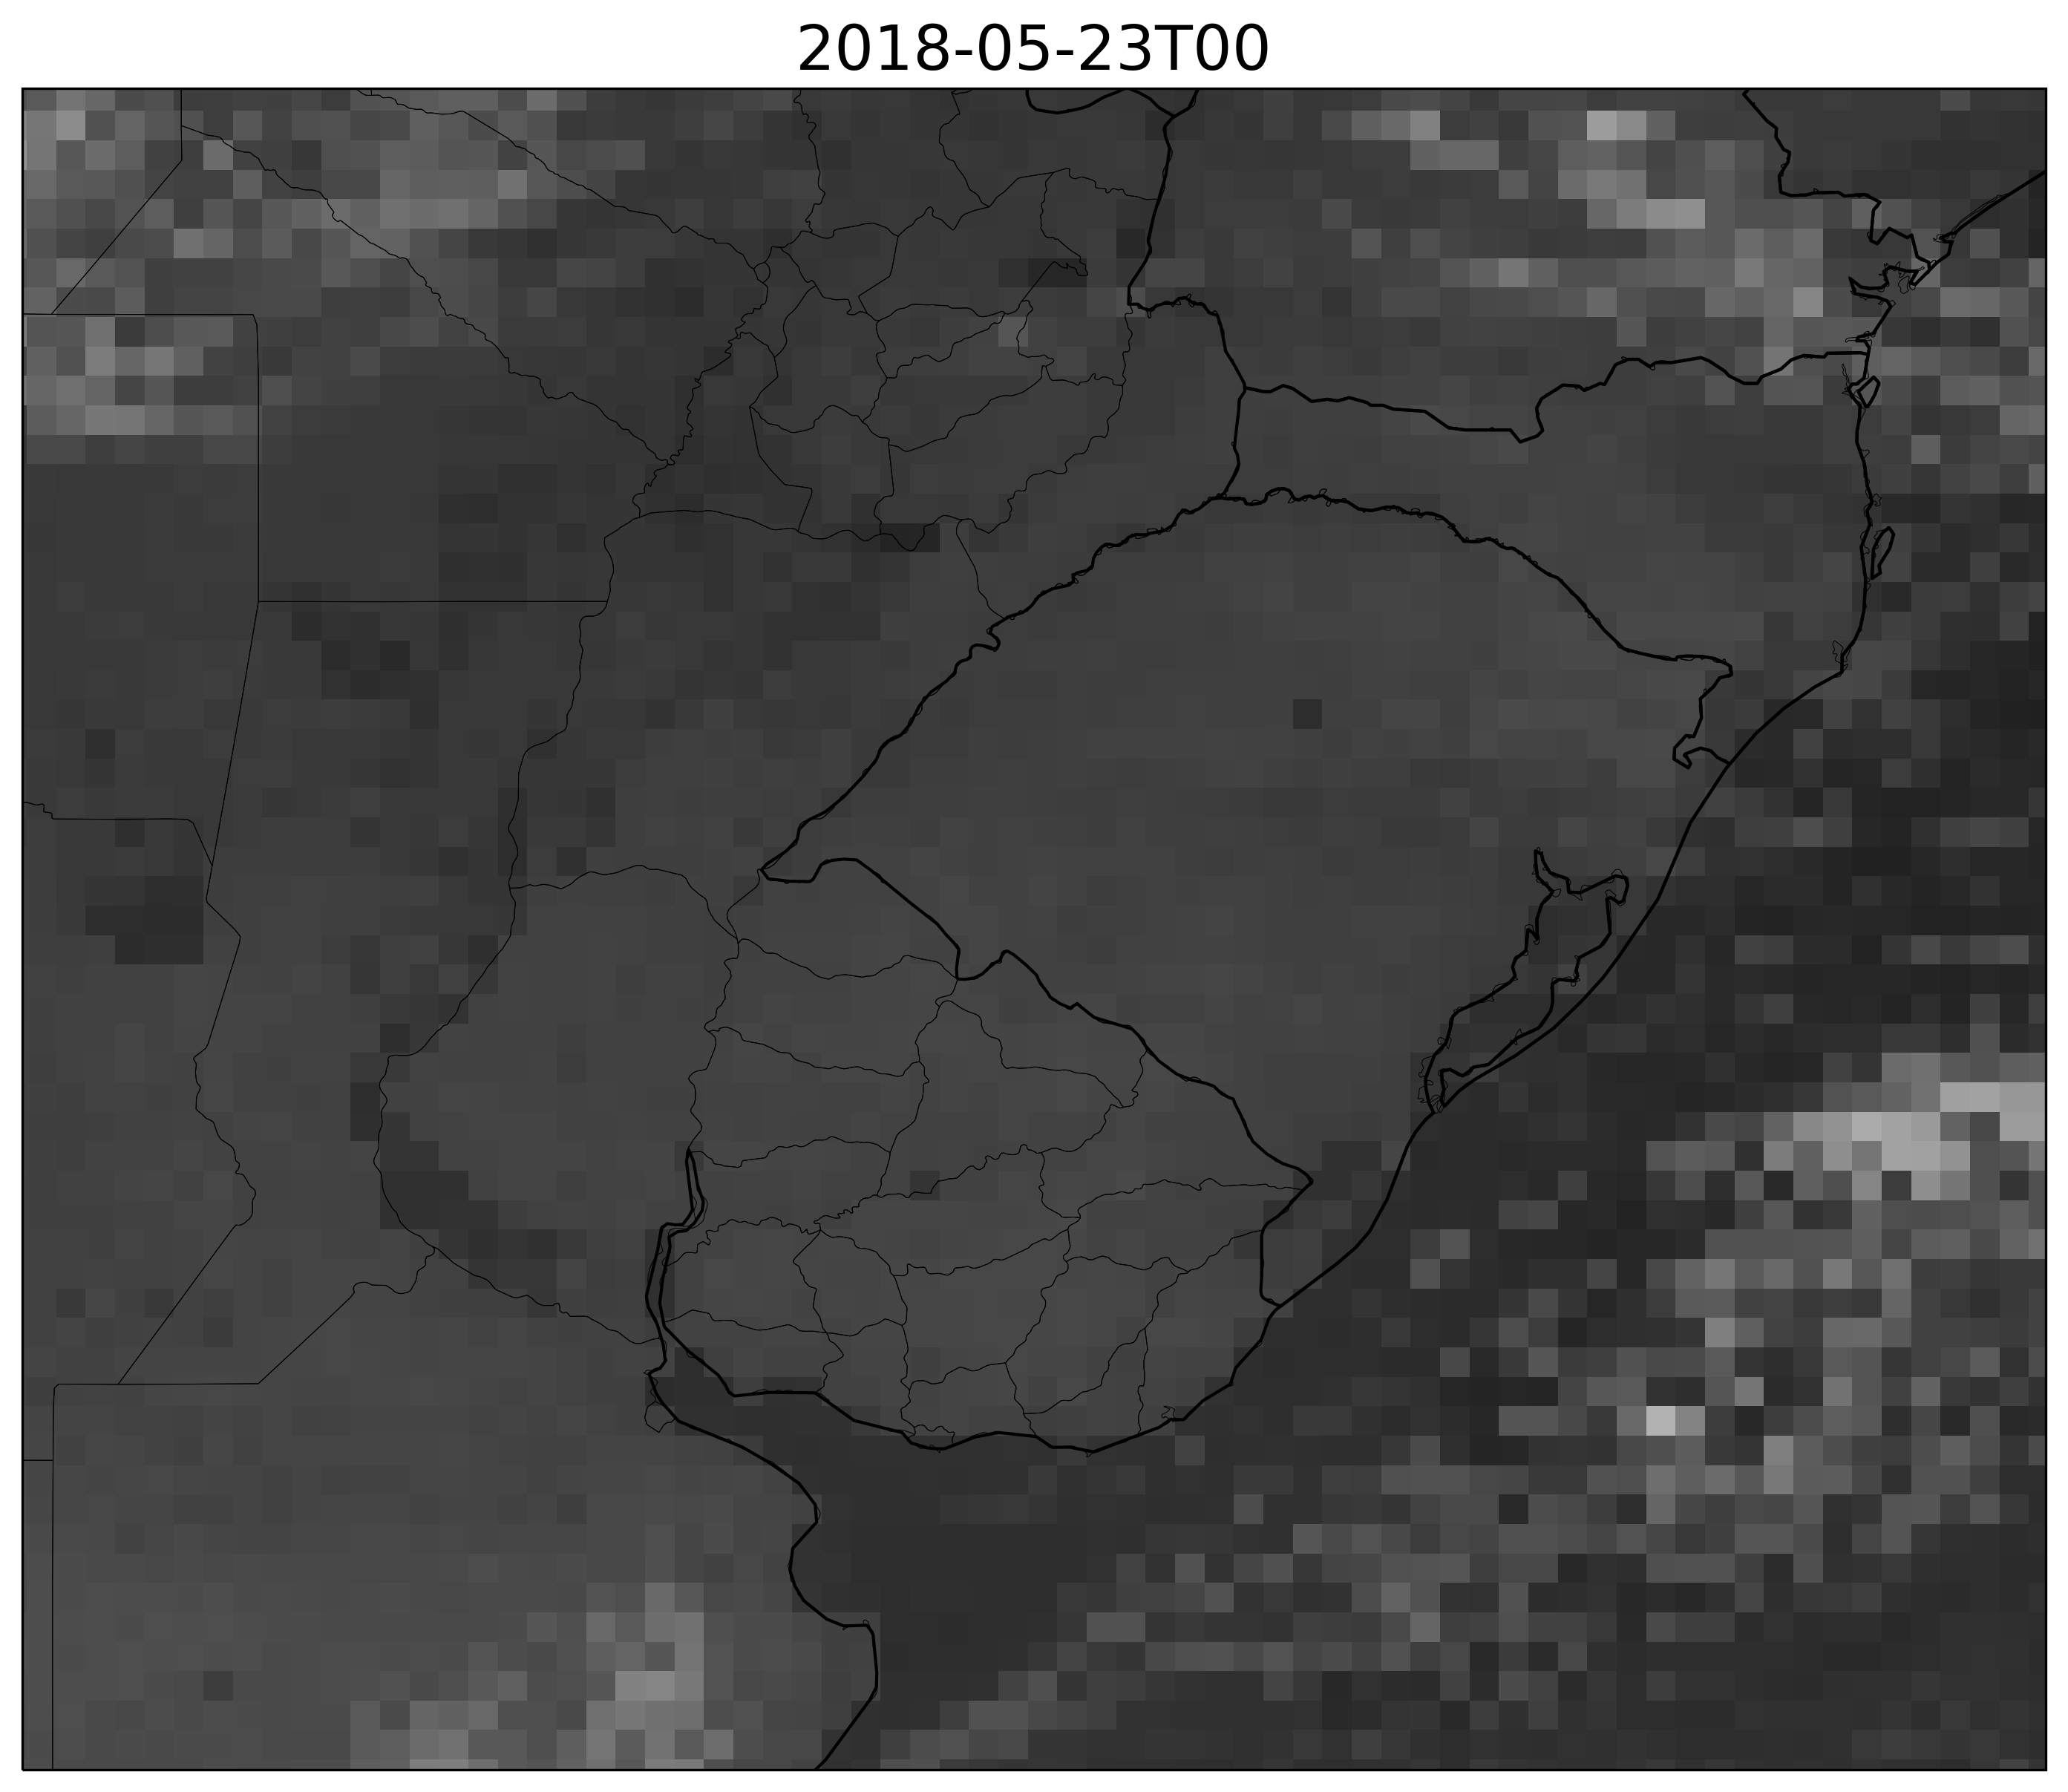

In [15]:
for pdr in pdrs:
    for time in pdr:
        month = time.month
        day = time.day
        hour = time.hour
        path = '/home/lucasdmarten/goes16/2018/{:02d}/{:02d}/ABI-L2-CMIPF/{:02d}/C13/'.format(month,day,hour)
        file = os.listdir('/home/lucasdmarten/goes16/2018/{:02d}/{:02d}/ABI-L2-CMIPF/{:02d}/C13'.format(month,day,hour))[-1]
        data = xarray.open_dataset(path+file)
        cmi = data["CMI"][:]-273.15
        time=str(cmi.t.values)[:-16]
        # We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
        datacrs = ccrs.PlateCarree()
        dat = data.metpy.parse_cf('CMI')

        geos = dat.metpy.cartopy_crs

        # We also need the x (north/south) and y (east/west) axis sweep of the ABI data
        x = dat.x
        y = dat.y

        fig = plt.figure(figsize=(12, 10), dpi=300)

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

        ax.add_feature(cf.COASTLINE.with_scale('50m'))
        ax.add_feature(cf.STATES.with_scale('50m'))
        cmi = ax.imshow(cmi, origin='upper',vmin=-85,vmax=35, cmap=get_cmap('gray_r'),
                  extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)
        ax.set_extent([lon.min(),lon.max(),lat.max(),lat.min()])
        ax.coastlines(resolution='50m', color='black', linewidth=0.25)
        ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
        ax.set_title(time, fontsize=20)
        ax.set_xticks(fontsize=20)

        gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabels_top = False
        gl.ylabels_right = False
        fig.colorbar(cmi, ax=ax, orientation='horizontal', label='C°', pad=0.06)
        plt.savefig('{}'.format(time))

In [ ]:
FILE11 = ('/home/lucasdmarten/goes16/2018/05/23/ABI-L2-CMIPF/12/C13/OR_ABI-L2-CMIPF-M3C13_G16_s20181431200436_e20181431211214_c20181431211290.nc')
C11 = xarray.open_dataset(FILE11)

In [ ]:
FILE11 = ('/home/lucasdmarten/goes16/2018/05/23/ABI-L2-CMIPF/12/C13/OR_ABI-L2-CMIPF-M3C13_G16_s201814312


In [17]:
FILE11 = ('/home/lucasdmarten/goes16/2018/05/23/ABI-L2-CMIPF/12/C13/OR_ABI-L2-CMIPF-M3C13_G16_s20181431200436_e20181431211214_c20181431211290.nc')
C11 = xarray.open_dataset(FILE11)
FILE12 = ('/home/lucasdmarten/goes16/2018/05/24/ABI-L2-CMIPF/12/C13/OR_ABI-L2-CMIPF-M3C13_G16_s20181441200441_e20181441211219_c20181441211303.nc')
C12 = xarray.open_dataset(FILE12)

FILE21 = ('/home/lucasdmarten/goes16/2018/09/23/ABI-L2-CMIPF/12/C13/OR_ABI-L2-CMIPF-M3C13_G16_s20182661200342_e20182661211120_c20182661211196.nc')
C21 = xarray.open_dataset(FILE21)
FILE22 = ('/home/lucasdmarten/goes16/2018/09/24/ABI-L2-CMIPF/12/C13/OR_ABI-L2-CMIPF-M3C13_G16_s20182671200345_e20182671211123_c20182671211198.nc')
C22 = xarray.open_dataset(FILE22)

In [18]:
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(C.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end = datetime.strptime(C.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(C.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
midpoint = str(C['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : {}'.format(scan_start))
print('Scan midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))


NameError: name 'C' is not defined

In [19]:
C11

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5424, y: 5424)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1518 ... -0.1518
  * x                                       (x) float32 -0.1518 ... 0.1518
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength                         (band) float32 ...
    band_id                                 (band) int32 ...
Dimensions without coordinates: band, number_of_image_bounds, number_of_time_bounds
Data variables: (12/29)
    CMI                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    algorithm_dynamic_input_data_container  int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    earth_sun_distance_anomaly_in_AU        float32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2018-05-23T12:00:43.6Z
    time_coverage_end:         2018-05-23T12:11:21.4Z
    timeline_id:               ABI Mode 3
    production_data_source:    Realtime
    id:                        3be0db1b-2162-42cb-bbe9-b2253c6b17df

In [20]:
CMI11=C11["CMI"][:]-273.15
CMI12=C12["CMI"][:]-273.15
CMI21=C21["CMI"][:]-273.15
CMI22=C22["CMI"][:]-273.15

/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warn

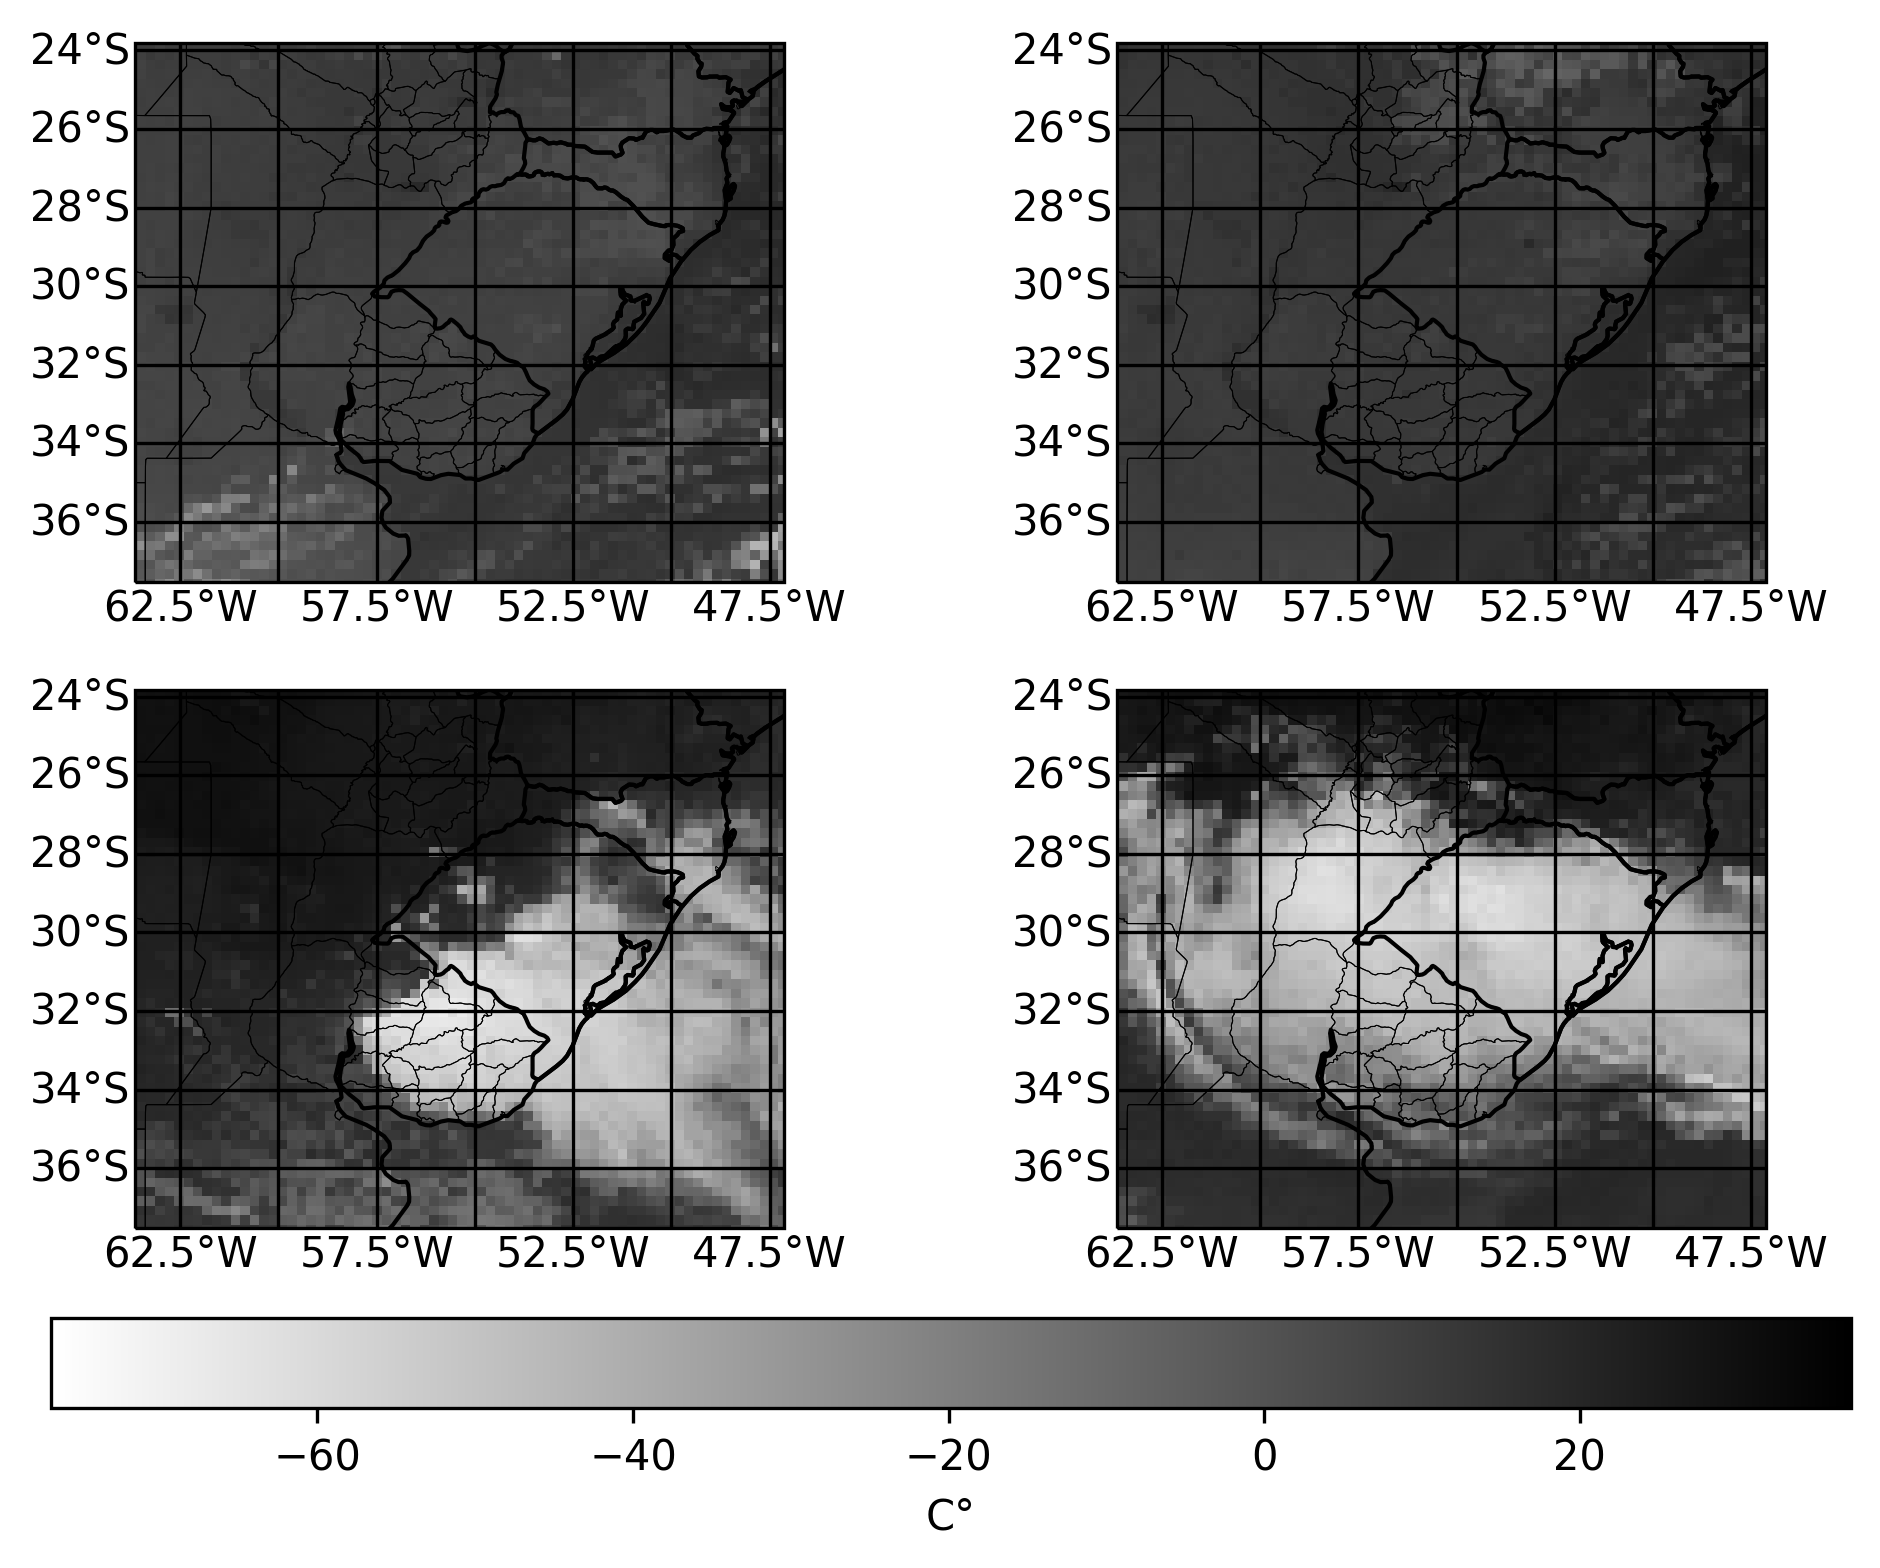

In [22]:
# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
datacrs = ccrs.PlateCarree()
dat = C11.metpy.parse_cf('CMI')

geos = dat.metpy.cartopy_crs

# We also need the x (north/south) and y (east/west) axis sweep of the ABI data
x = dat.x
y = dat.y

fig = plt.figure(figsize=(20, 10), dpi=300)

ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.STATES.with_scale('50m'))
cmi = ax.imshow(CMI11, origin='upper', cmap=get_cmap('gray_r'),
          extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)
ax.set_extent([lon.min(),lon.max(),lat.max(),lat.min()])
ax.coastlines(resolution='50m', color='black', linewidth=0.25)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False

ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.add_feature(cf.COASTLINE.with_scale('50m'))
ax2.add_feature(cf.STATES.with_scale('50m'))

cmi2 = ax2.imshow(CMI12, origin='upper', cmap=get_cmap('gray_r'),
          extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)
ax2.set_extent([lon.min(),lon.max(),lat.max(),lat.min()])
ax2.coastlines(resolution='50m', color='black', linewidth=0.25)
ax2.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
gl2 = ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabels_top = False
gl2.ylabels_right = False


ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.add_feature(cf.COASTLINE.with_scale('50m'))
ax3.add_feature(cf.STATES.with_scale('50m'))

cmi3 = ax3.imshow(CMI21, origin='upper', cmap=get_cmap('gray_r'),
          extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)
ax3.set_extent([lon.min(),lon.max(),lat.max(),lat.min()])
ax3.coastlines(resolution='50m', color='black', linewidth=0.25)
ax3.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
gl3 = ax3.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
gl3.xlabels_top = False
gl3.ylabels_right = False


ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.add_feature(cf.COASTLINE.with_scale('50m'))
ax4.add_feature(cf.STATES.with_scale('50m'))

cmi4 = ax4.imshow(CMI22, origin='upper', cmap=get_cmap('gray_r'),
          extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)
ax4.set_extent([lon.min(),lon.max(),lat.max(),lat.min()])
ax4.coastlines(resolution='50m', color='black', linewidth=0.25)
ax4.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
gl4 = ax4.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
gl4.xlabels_top = False
gl4.ylabels_right = False
plt.subplots_adjust(left=1, bottom=0.5, right=1.3, top=1, wspace=None, hspace=None)

fig.colorbar(cmi, ax=[ax,ax2,ax3,ax4], orientation='horizontal', label='C°', pad=0.06)
plt.savefig('./sat.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)

In [ ]:
CMI11

In [ ]:
FILE = ('/home/lucasdmarten/goes16/2018/09/24/ABI-L2-CMIPF/18/C13/OR_ABI-L2-CMIPF-M3C13_G16_s20182671800343_e20182671811122_c20182671811198.nc')
C = xarray.open_dataset(FILE)
CMI=C["CMI"][:]

# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
datacrs = ccrs.PlateCarree()
dat = C.metpy.parse_cf('CMI')

geos = dat.metpy.cartopy_crs

# We also need the x (north/south) and y (east/west) axis sweep of the ABI data
x = dat.x
y = dat.y

fig = plt.figure(figsize=(15, 12))

# Create axis with Geostationary projection
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.STATES.with_scale('50m'))


cmi = ax.imshow(CMI, origin='upper', cmap=get_cmap('gray_r'),
          extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)
plt.colorbar(cmi, orientation='horizontal', pad=0, aspect=25)

ax.set_extent([-80,-25,-15,-60])
# Add Coastlines and States
ax.coastlines(resolution='50m', color='black', linewidth=0.25)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False

plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')), loc='right')
plt.savefig('./c13_h500_ctt.png')